<a href="https://colab.research.google.com/github/kkettip/datasci_6_regression/blob/main/datasci_6_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [5]:
!pip install ucimlrepo

In [6]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)



{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

**Simple Linear Regression**

In [7]:
df = pd.DataFrame(heart_disease.data.features)
X = df["age"]
y = df["thalach"]

In [8]:
# Fit the regression model
X_c = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X_c)
results = model.fit()

# Print summary of the regression
print(results.summary())

residuals = results.resid
fitted = results.fittedvalues

                            OLS Regression Results                            
Dep. Variable:                thalach   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     55.25
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           1.11e-12
Time:                        04:57:35   Log-Likelihood:                -1352.3
No. Observations:                 303   AIC:                             2709.
Df Residuals:                     301   BIC:                             2716.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        203.8634      7.399     27.553      0.0

In [9]:
##### CHECKING ASSUMPTIONS #####

### Assessing linearity of the relationship
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=0.9772151218961352, p-value=0.5563343407176566


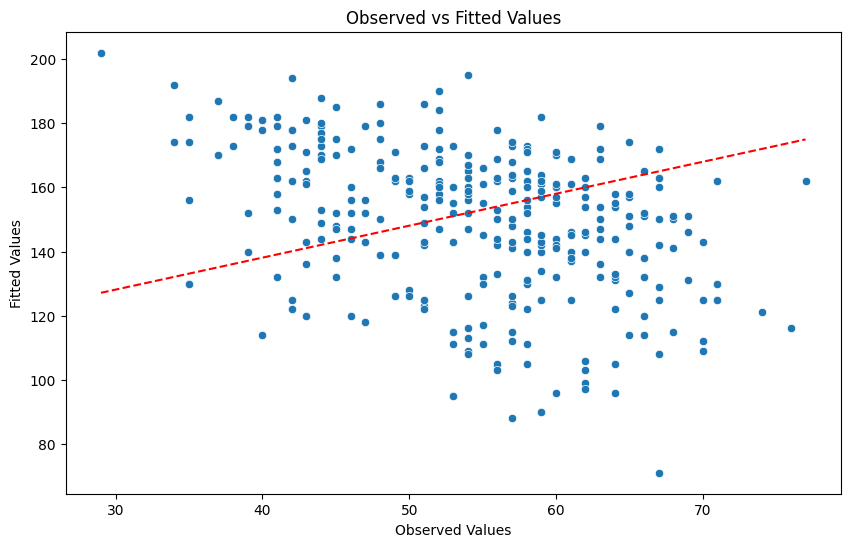

In [10]:
## A significant p-value indicates that the relationship is not linear.
# Plot observed vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X, y=y)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(X), max(X)], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()

Shapiro-Wilk Test: W=0.9613328576087952, p-value=3.295332078323554e-07


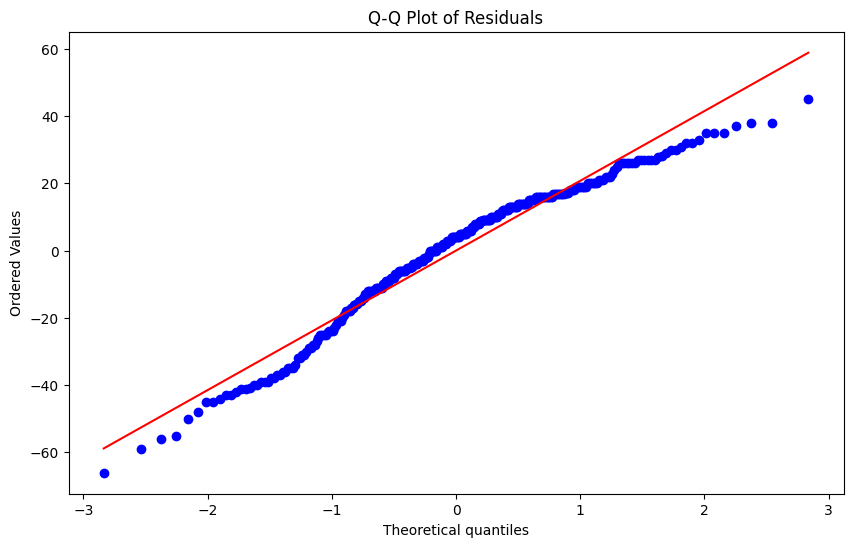

Goldfeld-Quandt Test: F-statistic=1.303913862675679, p-value=0.05286550432673299


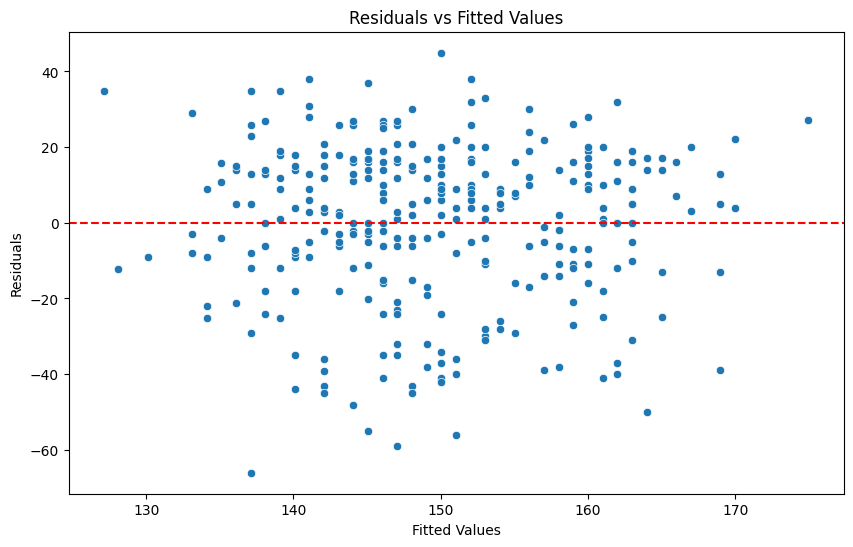

In [11]:
### Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


##### Assessing the homogeneity of variance of the residuals
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

# a significant p-value indicates heteroscedasticity, meaning that the variance of the
# residuals is not constant across different levels of the independent variable(s).

## Goldfeld-Quandt Test: The Goldfeld-Quandt test is another test used to assess homoscedasticity.
## It divides the data into two groups and compares the variance of the residuals in the two groups.

# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

**Multiple Linear Regression**

                            OLS Regression Results                            
Dep. Variable:                thalach   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     27.85
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           8.02e-12
Time:                        05:03:58   Log-Likelihood:                -1352.0
No. Observations:                 303   AIC:                             2710.
Df Residuals:                     300   BIC:                             2721.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        204.1309      7.414     27.535      0.0

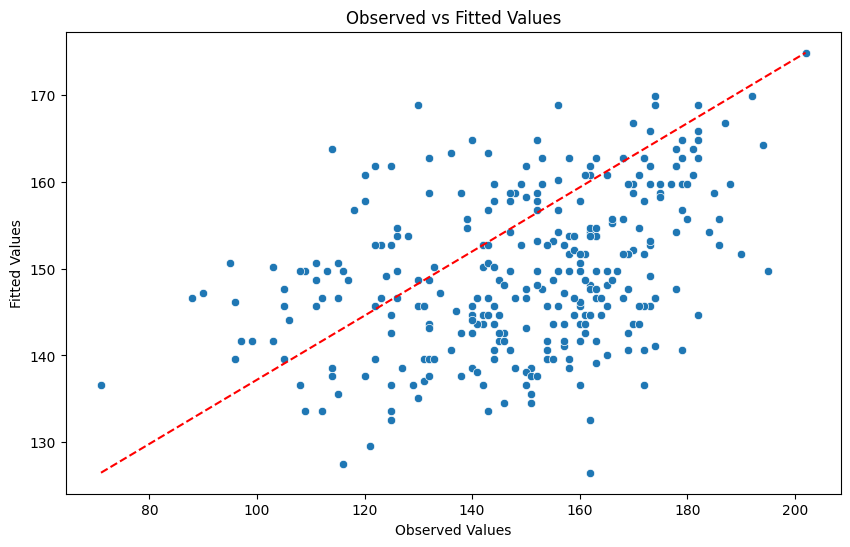

Shapiro-Wilk Test: W=0.9617113471031189, p-value=3.711596150424157e-07


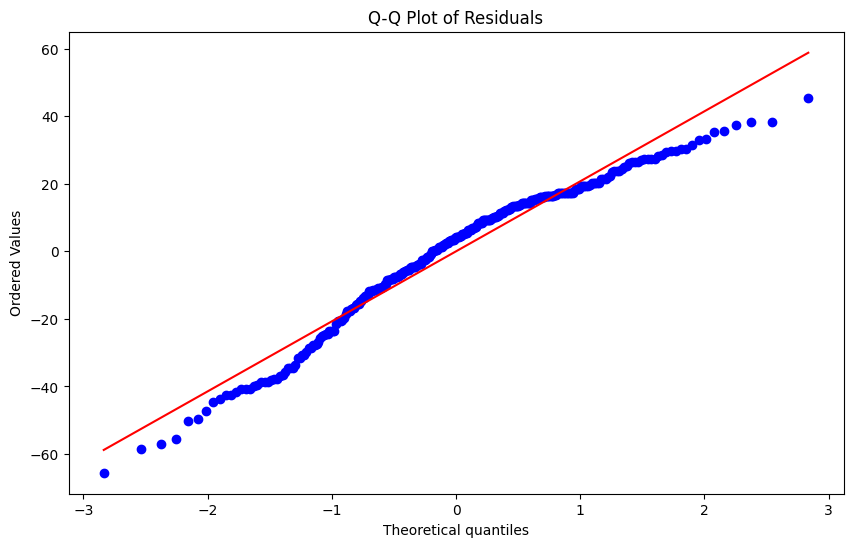

Goldfeld-Quandt Test: F-statistic=1.3163726482675009, p-value=0.04747462066377246


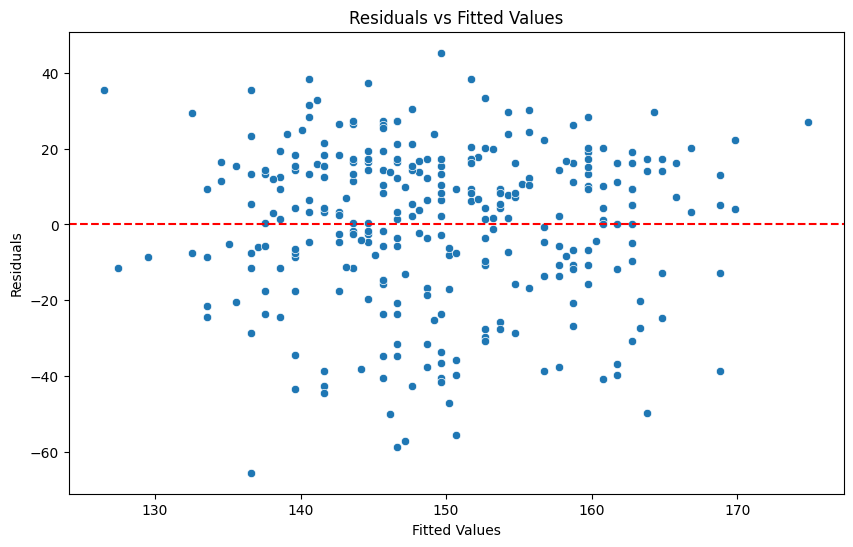

In [12]:
# Fit the regression model
X = df[['age', 'fbs']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df["thalach"]
model = sm.OLS(y, X)
results = model.fit()

# Print summary of the regression
print(results.summary())


residuals = results.resid
fitted = results.fittedvalues


##### CHECKING ASSUMPTIONS #####

# Checking multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Data:")
print(vif_data)

### Assessing linearity of the relationship
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

## A significant p-value indicates that the relationship is not linear.
# Plot observed vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y, y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(y), max(y)], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()




### Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()




##### Assessing the homogeneity of variance of the residuals
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

# a significant p-value indicates heteroscedasticity, meaning that the variance of the
# residuals is not constant across different levels of the independent variable(s).

# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()
